In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Numerical Simultaion of Wave's equation

# We will obtain the solution of the following problem:

"""u_tt(x,t) = 4*u_xx(x,t)                        (x, t) ∈ (0, 1) × (0, 1/2),
   u(0, t) = 0, u(1, t) = 0,                       t ∈ [0, 1/2],
   u(x, 0) = sen(πx) + sen(2πx), ut(x, 0) = 0,     x ∈ [0, 1],
"""
# That means, we had an one-dimensional rope of length 1, placed in axis x. 
# u(x0,t0) will indicate the position of point x0 in the rope when t is in the time t0 of the experiment.

# Initial conditions: At the beginning of the experiment, the position on each point can be calculated as sen(πx) + sen(2πx).

# Boundary conditions: Position of both sides are fixed during the experiment in the point 0

# Una vez interpretado el problema que se nos plantea procedemos a su resolución numérica.

# Defining the rectangle where the equation is defined: 

a = 1 # x vary between 0 y 1
b = 1/2 # t vary between 0 y 1/2

# Defining the steps for the mesh:

h = 1/10 # Step in variable x
k = 5/100 # Step in variable t
r = 2*k/h # Defining r which will be useful later r=c*k/h = 1 

# As r = 1 <= 1, we can say the method is stable, that is, error is cushioned in each iteration.

# Defining the mesh:

n = int(a/h) # Nº intervals in axis x
m = int(b/k) # Nº intervals in axis t
x_i = np.arange(0,a+h,h) # Partition in the x variable
t_j = np.arange(0,b+k,k) # Partition in the t variable

# To obtain the first row of the mesh (when t=0)
def f_i(x):
    return np.sin(np.pi*x) + np.sin(2*np.pi*x);

# Defining also g(x)=0 for later:

def g_i(x):
    return 0;

row_1 = f_i(x_i)

# To obtain the second row of the mesh (when t=k)

def row_2_mesh(x_i):
    result = np.zeros(n+1)
    for i in range(1,n): 
        result[i] = (1-r**2)*f_i(x_i[i]) + k*g_i(x_i[i]) + (r**2*(f_i(x_i[i+1])+f_i(x_i[i-1])))/2;
    return result;

row_2 = row_2_mesh(x_i)

# Initializing the mesh
mesh = np.zeros((m+1,n+1))

# Introducing the first two rows, already calculated:

mesh[0,:] = row_1
mesh[1,:] = row_2

# Rest of the points
for j in range(2,m+1):
    for i in range(1,n):    
        mesh[j][i] = (2-2*r**2)*mesh[j-1][i] + r**2*(mesh[j-1][i+1] + mesh[j-1][i-1]) - mesh[j-2][i]

# Displaying the approaches
df_1 = pd.DataFrame(mesh, columns = x_i, index = t_j)
display(df_1)

# Checking with the analytical solution

sol_analytical = np.zeros((m+1,n+1))

for j in range(m+1):
    for i in range(n+1):
        sol_analytical[j][i] = np.sin(np.pi*x_i[i])*np.cos(2*np.pi*t_j[j]) + np.sin(2*np.pi*x_i[i])*np.cos(4*np.pi*t_j[j])
        
# Display de analytical solution

df_2 = pd.DataFrame(sol_analytical, columns = x_i, index = t_j)
display(df_2)


,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00
0.00,0.00,0.90,1.54,1.76,1.54,1.00,0.36,-0.14,-0.36,-0.28,-0.00
0.05,0.00,0.77,1.33,1.54,1.38,0.95,0.43,-0.00,-0.21,-0.18,0.00
0.10,0.00,0.43,0.77,0.95,0.95,0.81,0.59,0.36,0.18,0.07,0.00
0.15,0.00,-0.00,0.05,0.18,0.38,0.59,0.74,0.77,0.64,0.36,0.00
0.20,0.00,-0.38,-0.59,-0.52,-0.18,0.31,0.77,1.02,0.95,0.57,0.00
0.25,0.00,-0.59,-0.95,-0.95,-0.59,-0.00,0.59,0.95,0.95,0.59,0.00
0.30,0.00,-0.57,-0.95,-1.02,-0.77,-0.31,0.18,0.52,0.59,0.38,0.00
0.35,0.00,-0.36,-0.64,-0.77,-0.74,-0.59,-0.38,-0.18,-0.05,-0.00,0.00
0.40,0.00,-0.07,-0.18,-0.36,-0.59,-0.81,-0.95,-0.95,-0.77,-0.43,0.00
0.45,0.00,0.18,0.21,0.00,-0.43,-0.95,-1.38,-1.54,-1.33,-0.77,0.00


,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00
0.00,0.00,0.90,1.54,1.76,1.54,1.00,0.36,-0.14,-0.36,-0.28,-0.00
0.05,0.00,0.77,1.33,1.54,1.38,0.95,0.43,0.00,-0.21,-0.18,-0.00
0.10,0.00,0.43,0.77,0.95,0.95,0.81,0.59,0.36,0.18,0.07,0.00
0.15,0.00,-0.00,0.05,0.18,0.38,0.59,0.74,0.77,0.64,0.36,0.00
0.20,0.00,-0.38,-0.59,-0.52,-0.18,0.31,0.77,1.02,0.95,0.57,0.00
0.25,0.00,-0.59,-0.95,-0.95,-0.59,-0.00,0.59,0.95,0.95,0.59,0.00
0.30,-0.00,-0.57,-0.95,-1.02,-0.77,-0.31,0.18,0.52,0.59,0.38,0.00
0.35,-0.00,-0.36,-0.64,-0.77,-0.74,-0.59,-0.38,-0.18,-0.05,0.00,0.00
0.40,0.00,-0.07,-0.18,-0.36,-0.59,-0.81,-0.95,-0.95,-0.77,-0.43,-0.00
0.45,0.00,0.18,0.21,-0.00,-0.43,-0.95,-1.38,-1.54,-1.33,-0.77,-0.00


In [3]:
# Error of the method

error = abs(sol_analytical-mesh)
pd.options.display.float_format = '{:.2E}'.format
df_3 = pd.DataFrame(error, columns = x_i, index = t_j)
display(df_3)

,0.00E+00,1.00E-01,2.00E-01,3.00E-01,4.00E-01,5.00E-01,6.00E-01,7.00E-01,8.00E-01,9.00E-01,1.00E+00
0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00,0.00E+00
5.00E-02,0.00E+00,0.00E+00,0.00E+00,2.22E-16,0.00E+00,2.22E-16,4.44E-16,1.11E-16,1.39E-16,1.11E-16,8.17E-17
1.00E-01,0.00E+00,1.11E-16,3.33E-16,1.11E-16,6.66E-16,0.00E+00,0.00E+00,0.00E+00,2.22E-16,1.39E-16,2.34E-17
1.50E-01,0.00E+00,8.33E-17,2.78E-16,5.55E-16,3.33E-16,3.33E-16,3.33E-16,1.11E-16,0.00E+00,3.33E-16,1.48E-16
2.00E-01,0.00E+00,5.55E-17,7.77E-16,0.00E+00,5.55E-16,1.11E-16,6.66E-16,2.22E-16,0.00E+00,1.11E-16,2.36E-16
2.50E-01,0.00E+00,4.44E-16,1.11E-16,5.55E-16,2.22E-16,6.05E-16,5.55E-16,5.55E-16,4.44E-16,1.11E-16,2.45E-16
3.00E-01,0.00E+00,1.11E-16,4.44E-16,4.44E-16,4.44E-16,0.00E+00,7.22E-16,0.00E+00,2.22E-16,4.44E-16,1.60E-16
3.50E-01,0.00E+00,2.22E-16,2.22E-16,3.33E-16,3.33E-16,7.77E-16,5.55E-16,8.88E-16,5.00E-16,8.05E-16,3.70E-18
4.00E-01,0.00E+00,2.50E-16,2.78E-16,2.22E-16,4.44E-16,5.55E-16,7.77E-16,6.66E-16,8.88E-16,1.11E-16,1.75E-16
4.50E-01,0.00E+00,1.11E-16,2.22E-16,1.11E-16,5.55E-16,6.66E-16,4.44E-16,8.88E-16,2.22E-16,0.00E+00,3.15E-16


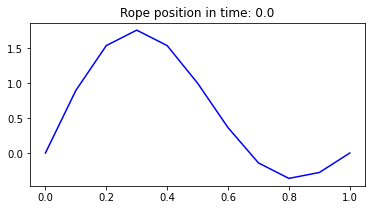

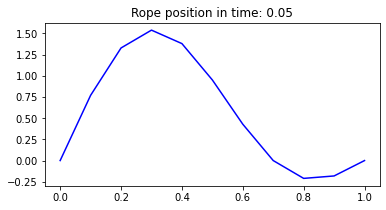

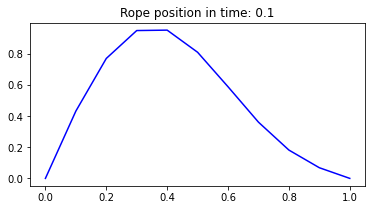

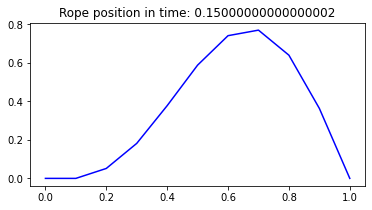

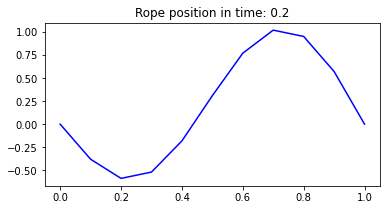

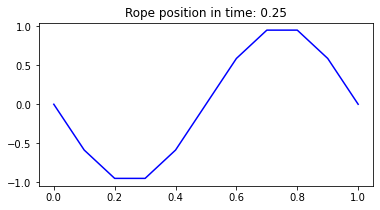

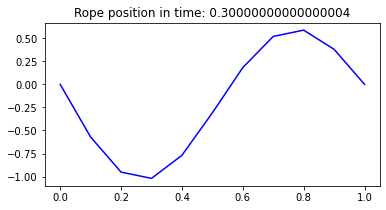

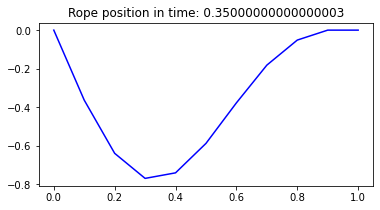

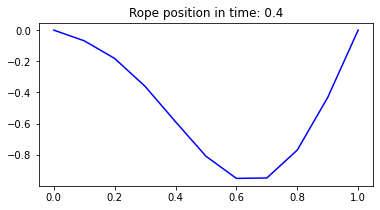

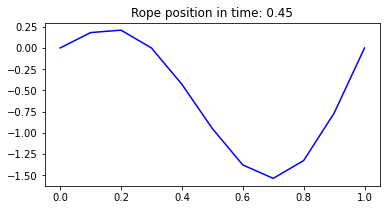

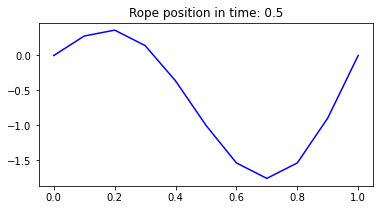

In [4]:
# Ploting the rope in differents moments of the experiment

for k in range(m+1):
    title = "Rope position in time: "+ str(t_j[k])
    plt.figure(figsize = (6,3));
    plt.title(title)
    plt.plot(x_i,mesh[k][:],'b');
    plt.show();